In [113]:
!pip install geopandas


In [114]:
!pip install pyshp

# Importando o banco de dados e as bibliotecas necessárias

In [115]:
import pandas as pd
import geopandas as gpd
import numpy as np
import shapefile as shp
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [116]:
padrao = pd.read_excel('/content/drive/My Drive/Tabelas Finais CAMG /padrao_municipios.xlsx')
padrao['municipio'] = padrao['municipio'].str.strip()

In [117]:
padrao.head()

,cdmun,codigo_ibge,municipio,regional,latitude,longitude
0,10,3100104,ABADIA DOS DOURADOS,UBERLANDIA,-18.4831,-47.3916
1,20,3100203,ABAETE,DIVINOPOLIS,-19.1551,-45.4444
2,30,3100302,ABRE CAMPO,TIMOTEO,-20.2996,-42.4743
3,40,3100401,ACAIACA,TIMOTEO,-20.3590,-43.1439
4,50,3100500,ACUCENA,GOVERNADOR VALADARES,-19.0671,-42.5419


Carregando o arquivo SHP para plotar os mapas com os clusters.

In [118]:
shp_path = '/content/drive/My Drive/Bancos de Dados CAMG/Mapa MG/MG_Unidade_Federacao_2017_ago.shp'
mapamg = gpd.read_file(shp_path)
mg = shp.Reader(shp_path)

## Funções

In [158]:
def k_means(n_clust: int, df:pd.DataFrame):
  kmeans = KMeans(n_clusters = n_clust, init ='k-means++', n_init= 1000, max_iter = 10000)
  kmeans.fit(df[df.columns[2:4]]) # Compute k-means clustering.
  df['cluster_label'] = kmeans.fit_predict(df[df.columns[2:4]])
  centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
  labels = kmeans.predict(df[df.columns[2:4]]) # Labels of each point
  return df

In [150]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plotar_mapa(gdf:gpd.GeoDataFrame, n_clusters:int):
  sns.set(style= "whitegrid", palette= "pastel", color_codes=True)
  fig, ax = plt.subplots(1,1, figsize = (10, 10))
  plt.title(f'Distribuição dos municípios por proximidade geográfica - {n_clusters} clusters')
  divider = make_axes_locatable(ax)  # para alinhar a legenda ao mapa
  cax = divider.append_axes("right", size="5%", pad=0.1) #para alinhar a legenda ao mapa
  mapamg.plot(ax=ax, color = 'grey', figsize = (10,10), alpha = 0.4)
  gdf.plot(ax=ax, column = 'cluster_label', cmap='CMRmap', legend = True, cax = cax)
  plt.show()

## 4 Lotes

In [119]:
padrao = padrao[['codigo_ibge', 'municipio', 'latitude', 'longitude']]

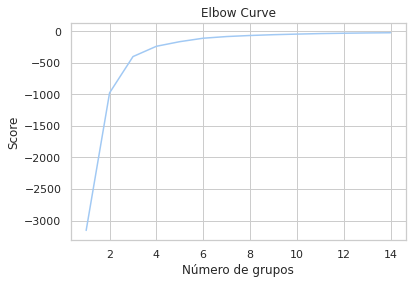

In [120]:
K_clusters = range(1,15)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = padrao[['latitude']]
X_axis = padrao[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))] # Visualize
plt.plot(K_clusters, score)
plt.xlabel('Número de grupos')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [121]:
cluster4 = padrao
cluster4 = cluster4[['codigo_ibge', 'municipio', 'latitude', 'longitude']]

In [122]:
cluster4.head()

,codigo_ibge,municipio,latitude,longitude
0,3100104,ABADIA DOS DOURADOS,-18.4831,-47.3916
1,3100203,ABAETE,-19.1551,-45.4444
2,3100302,ABRE CAMPO,-20.2996,-42.4743
3,3100401,ACAIACA,-20.3590,-43.1439
4,3100500,ACUCENA,-19.0671,-42.5419


In [159]:
cluster4 = k_means(4, cluster4)

In [160]:
cluster4.head()

,codigo_ibge,municipio,latitude,longitude,cluster_label,geometry
0,3100104,ABADIA DOS DOURADOS,-18.4831,-47.3916,2,POINT (-47.39160 -18.48310)
1,3100203,ABAETE,-19.1551,-45.4444,2,POINT (-45.44440 -19.15510)
2,3100302,ABRE CAMPO,-20.2996,-42.4743,3,POINT (-42.47430 -20.29960)
3,3100401,ACAIACA,-20.3590,-43.1439,3,POINT (-43.14390 -20.35900)
4,3100500,ACUCENA,-19.0671,-42.5419,3,POINT (-42.54190 -19.06710)


In [161]:
geo_4 = gpd.GeoDataFrame(
    cluster4, geometry=gpd.points_from_xy(cluster4.longitude,cluster4.latitude))

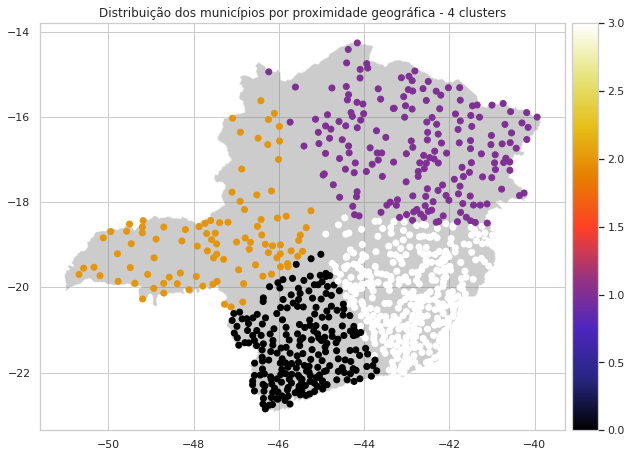

In [162]:
plotar_mapa(geo_4, 4)

In [127]:
geo_4['cluster_label'].value_counts()

0    339
2    231
1    186
3     97
Name: cluster_label, dtype: int64

## 5 Lotes

In [128]:
cluster5 = padrao

In [129]:
cluster5 = cluster5[['codigo_ibge', 'municipio', 'latitude', 'longitude']]

In [164]:
cluster5 = k_means(5, cluster5)
cluster5.head()

,codigo_ibge,municipio,latitude,longitude,cluster_label,geometry
0,3100104,ABADIA DOS DOURADOS,-18.4831,-47.3916,2,POINT (-47.39160 -18.48310)
1,3100203,ABAETE,-19.1551,-45.4444,2,POINT (-45.44440 -19.15510)
2,3100302,ABRE CAMPO,-20.2996,-42.4743,4,POINT (-42.47430 -20.29960)
3,3100401,ACAIACA,-20.3590,-43.1439,4,POINT (-43.14390 -20.35900)
4,3100500,ACUCENA,-19.0671,-42.5419,4,POINT (-42.54190 -19.06710)


In [165]:
geo_5 = gpd.GeoDataFrame(
    cluster5, geometry=gpd.points_from_xy(cluster5.longitude,cluster5.latitude))

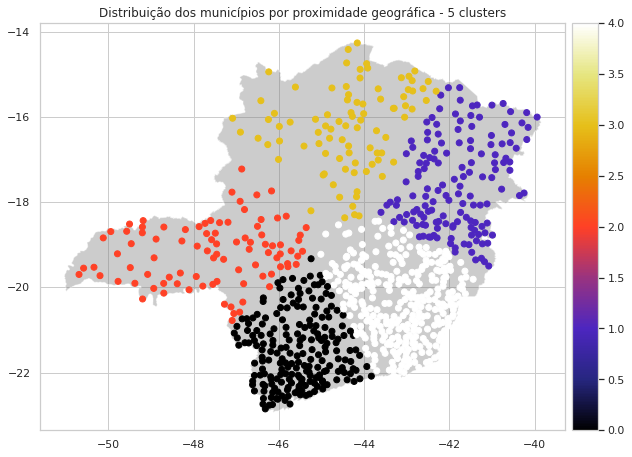

In [166]:
plotar_mapa(geo_5, 5)

In [169]:
geo_5['cluster_label'].value_counts()

4    321
0    207
1    146
2     91
3     88
Name: cluster_label, dtype: int64

## 6 Lotes



In [134]:
cluster6 = padrao

cluster6 = padrao[['codigo_ibge', 'municipio', 'latitude', 'longitude']]

In [135]:
cluster6.head()

,codigo_ibge,municipio,latitude,longitude
0,3100104,ABADIA DOS DOURADOS,-18.4831,-47.3916
1,3100203,ABAETE,-19.1551,-45.4444
2,3100302,ABRE CAMPO,-20.2996,-42.4743
3,3100401,ACAIACA,-20.3590,-43.1439
4,3100500,ACUCENA,-19.0671,-42.5419


In [171]:
cluster6 = k_means(6, cluster6)
cluster6.head()

,codigo_ibge,municipio,latitude,longitude,cluster_label,geometry
0,3100104,ABADIA DOS DOURADOS,-18.4831,-47.3916,2,POINT (-47.39160 -18.48310)
1,3100203,ABAETE,-19.1551,-45.4444,0,POINT (-45.44440 -19.15510)
2,3100302,ABRE CAMPO,-20.2996,-42.4743,3,POINT (-42.47430 -20.29960)
3,3100401,ACAIACA,-20.3590,-43.1439,3,POINT (-43.14390 -20.35900)
4,3100500,ACUCENA,-19.0671,-42.5419,3,POINT (-42.54190 -19.06710)


In [172]:
geo_6 = gpd.GeoDataFrame(
    cluster6, geometry=gpd.points_from_xy(cluster6.longitude,cluster6.latitude))

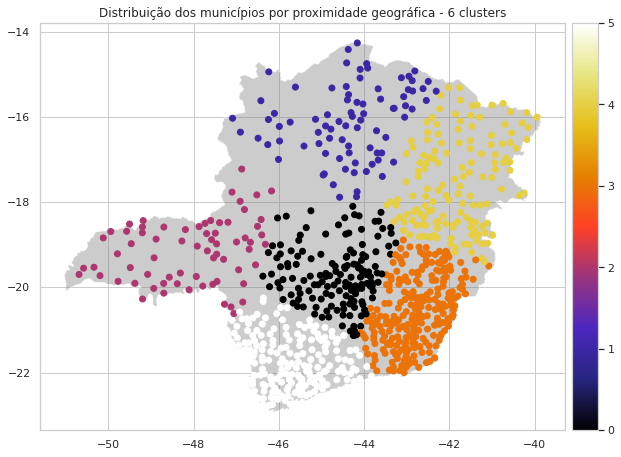

In [173]:
plotar_mapa(geo_6, 6)

In [174]:
geo_6['cluster_label'].value_counts()

3    233
5    173
0    150
4    145
1     83
2     69
Name: cluster_label, dtype: int64